<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression

What we're going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (*features* & *labels*)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

### Introduction to Regression with Neural Networks

**Regression** — predicting a numerical value based on some combination of variables

In [1]:
# Import TensorFlow
import tensorflow as tf
# Import NumPy and MatPlotLib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

### Creating data to view and fit

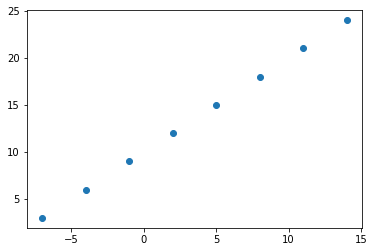

In [2]:
# Create features
_X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
_y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(_X, _y)

In [3]:
_y == _X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# Check the X and y feature shapes
input_shape = _X[0].shape
output_shape = _y[0].shape
input_shape, output_shape

((), ())

In [6]:
_X[0].ndim

0

In [7]:
_X[0], _y[0]

(-7.0, 3.0)

In [8]:
_X[1], _y[1]

(-4.0, 6.0)

In [9]:
# Turn NumPy array into tensors with dtype float32
X = tf.constant(_X, dtype=tf.float32)
y = tf.constant(_y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. **Creating a model** — define the `input` and `output layers`, as well as the `hidden layers` of a deep learning model.
2. **Compiling a model** — define the `loss function` (it tells our model how wrong it is) and the `optimizer` (it tells our model how to improve the patterns its learning) and `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fitting a model** — letting the model try to find patterns between `features` and `labels`

In [11]:
# Set a random seed
tf.random.set_seed(42)

In [12]:
# Create a model using the Sequential API
# The Input layer specifies that you are working with scalar inputs
model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), tf.keras.layers.Dense(1)])

# Compile the model
## mae > Mean Absolute Error
## SGD > Stochastic Gradient Descent
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 440ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improving the model

Improve the model by altering the steps taken in creating the model.
1. **Creating a model** — add more layer, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** — change the optimization function or perhaps the `learning rate` of the optimization function.
3. **Fitting a model** — fit a model for more `epochs` (leave it training for longer) or on more data (give the model more data to learn from)

In [15]:
# Rebuild the model

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 416ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [18]:
# Rebuild the model again

# Create the model (add a hidden layer with 100 neurons)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 465ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

In [19]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Predict
model.predict([17.0])

array([[31.223137]], dtype=float32)

In [21]:
# Rebuild the model again

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model (change the optimizer, changing the learning_rate from 0.0001 to 0.01 brings the prediction much closer to the desired output)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 613ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 52ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 21ms/s

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Predict again (y should be near 27)
model.predict([17.0])

array([[26.43606]], dtype=float32)

### Evaluating a model

When evaluating it's a good idea to visualize:
* *The data* — what data are we working with? what does it look like?
* *The model itself* — what does our model look like?
* *The training of a model* — how does a model perform while it learns?
* *The predictions of the model* — how do the predictions of a model line up against the `ground truth` (`original labels`)?


In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

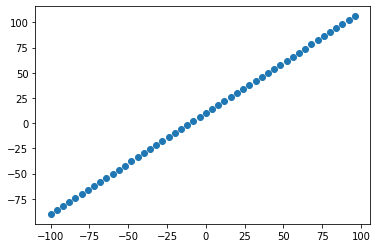

In [26]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Traninng set** — the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** — the model gets tuned on this data, which is 10-15% of the data available.
* **Test set** — the model gets evaluated on this data to test what it has learned, this set is 10-15% of the total data available.

In [27]:
# Check how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [29]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

### Visualizing the data

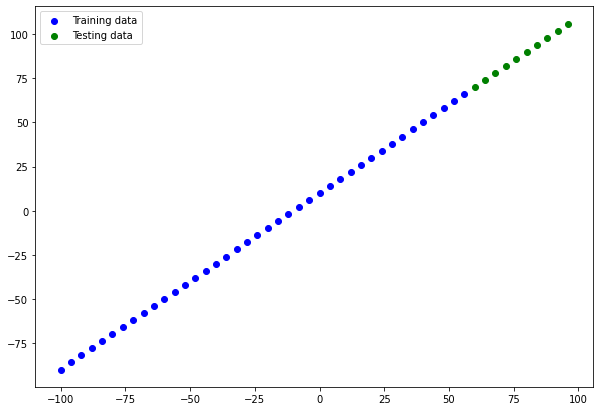

In [30]:
plt.figure(figsize=(10, 7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend()
plt.legend()

In [31]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=100)

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** — total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** — these parameters aren't updated during training.

📖 **Resource:** [Introduction to Deep Learning](https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&ab_channel=AlexanderAmini)

In [35]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

⚒ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number parameters (total and trainable) by calling `model.summary()`

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 45.3309 - mae: 45.3309
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 28.6364 - mae: 28.6364
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9839 - mae: 12.9839
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2116 - mae: 9.2116
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4002 - mae: 11.4002
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 7.2178 - mae: 7.2178
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 5.5000 - mae: 5.5000
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 7.5721 - mae: 7.5721
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5545 - mae: 7.5545
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 5.3523 - mae: 5.3523
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss

In [37]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 50)                550       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


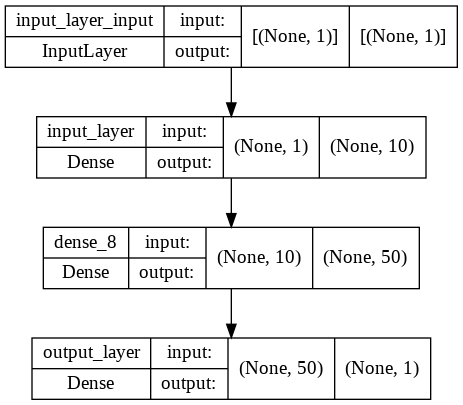

In [38]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

### Visualizing the model's prediction

It's a good idea to plot the model's predictions against the ground truth labels

`y_test` vs `y_pred`

In [39]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 75.329865],
       [ 79.642715],
       [ 83.95557 ],
       [ 88.268425],
       [ 92.581276],
       [ 96.894135],
       [101.206985],
       [105.51984 ],
       [109.83269 ],
       [114.14555 ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** It's a good idea to create a function if you're going to reuse some kind of functionality in the future

In [41]:
def plot_predictions(train_data=X_train, train_label=y_train,
                     test_data=X_test, test_label=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legends
  plt.legend()

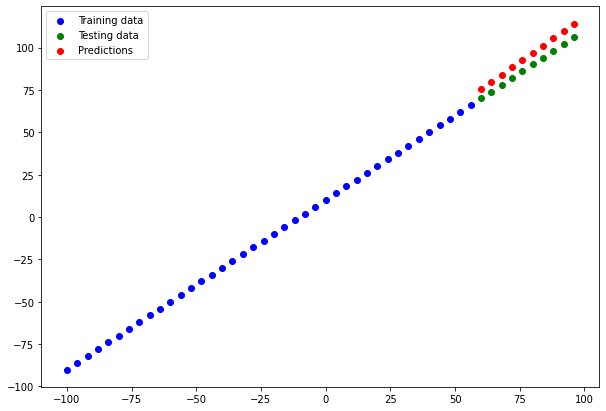

In [42]:
# Call the function
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

2 main metrics:
* `MAE` — Mean Absolute Error, used as a great starter metric for any regression problem.
* `MSE` — Mean Squared Error, used when larger errors are more significant than smaller errors.

In [43]:
# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 105ms/step - loss: 6.7377 - mae: 6.7377


[6.7377028465271, 6.7377028465271]

In [44]:
# Calculate the Mean Absolute Error
mae = tf.keras.metrics.mae(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.002081, 11.742914, 10.408887, 10.      , 10.516255, 11.957654,
       14.324191, 17.61587 , 21.832687, 26.145554], dtype=float32)>

In [45]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.329865],
       [ 79.642715],
       [ 83.95557 ],
       [ 88.268425],
       [ 92.581276],
       [ 96.894135],
       [101.206985],
       [105.51984 ],
       [109.83269 ],
       [114.14555 ]], dtype=float32)>

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.329865,  79.642715,  83.95557 ,  88.268425,  92.581276,
        96.894135, 101.206985, 105.51984 , 109.83269 , 114.14555 ],
      dtype=float32)>

In [48]:
tf.cast(y_test, dtype=tf.float32) - tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-5.3298645, -5.6427155, -5.9555664, -6.268425 , -6.581276 ,
       -6.8941345, -7.2069855, -7.5198364, -7.8326874, -8.145554 ],
      dtype=float32)>

In [49]:
mae = tf.metrics.mae(tf.cast(y_test, dtype=tf.float32), tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.7377043>

In [50]:
# Calculate the Mean Squared Error
mse = tf.metrics.mse(y_test, y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([292.53235, 201.84421, 148.35745, 132.07205, 152.9881 , 211.10564,
       306.42444, 438.94467, 608.6662 , 815.59   ], dtype=float32)>

In [51]:
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=46.20415>

In [52]:
# Create a function that reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [53]:
mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=6.7377043>

In [54]:
mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=46.20415>

### Running experiments to improve our model

1. Get more data — get more examples for the model to train on.
2. Make the model larger (using a more complex model) — this might come in the form of more layer or more hidden units in each layer.
3. Train for longer — give the model more chance to find patterns in the data.

In [55]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Build `model_1 > 1 layer - 100 epochs`

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

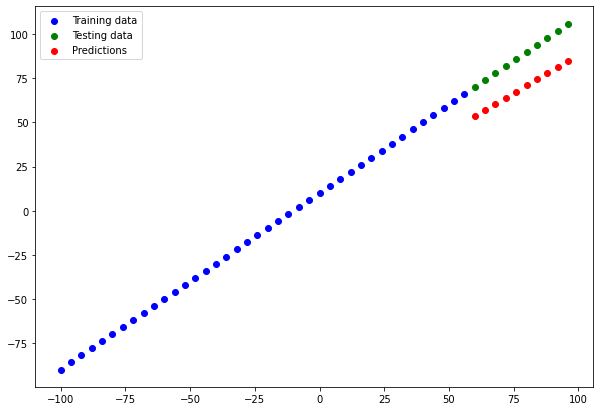

In [57]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [58]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### Build `model_2 > 2 dense layers - 100 epochs`

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1,], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Compile model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse")

# Fit model_2
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

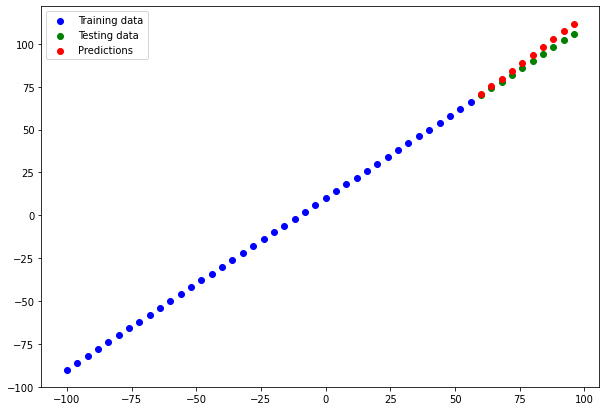

In [60]:
# Make and plot the predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [61]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

### Build `model_3 > 2 layers - 500 epochs`

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1,]),
    tf.keras.layers.Dense(1)
])

# Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit model_3
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 8ms

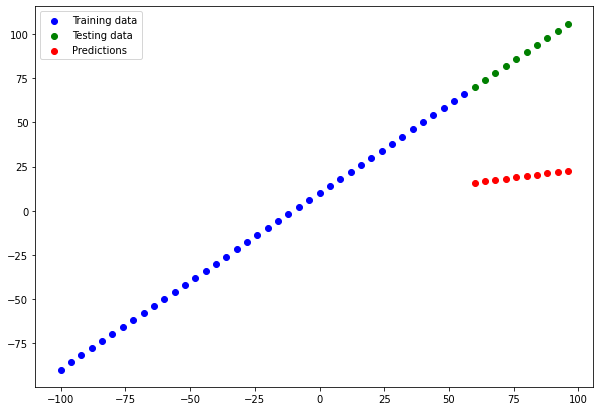

In [63]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [64]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note** Start with small experiments (small models) and make sure they work and then increase their scale when necessary.

*Start small, built-up
 when needed.*

### Comparing the results of our experiments

In [78]:
# Compare model's results using Pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like model_2 performed the best...

In [79]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note** One of your main goal should be to minimize the time between your experiments. The more experiments you do, the more thing you'll figure out which don't work and in turn, get closer to figuring out what does work. 

*experiment, experiment, experiment* 

### Tracking your experiments

📖 **Resource:** 
* [**TensorBoard**](https://www.tensorflow.org/tensorboard)— a component of the TensorFlow library to help track modelling experiments.
* [**Weights & Biases**](https://wandb.ai/site) — a tool for tracking all kinds of ML experiments

### Saving models

2 main formats when [saving a model](https://www.tensorflow.org/tutorials/keras/save_and_load):

1. The SavedModel format
2. The HDF5 format

In [67]:
# Save model using SavedModel format
model_2.save("model_2_SavedModel_format")

In [68]:
# Save model using HDF5 format
model_2.save("model_2_HDF5_format.h5")

### Loading in a saved model

In [69]:
# Load in SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("model_2_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compare model_2 predictions with SavedModel format predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/model_2_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Compare predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or any other file) from Google Colab

1. Go to files tab > Right click the file > Click `Download`.
2. Use code to download the file.
3. Save it to Google Drive and copying it there

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/model_2_HDF5_format.h5")

In [80]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/model_2_HDF5_format.h5 /content/drive/MyDrive/

In [81]:
!ls /content/drive/MyDrive/

'Colab Notebooks'   model_2_HDF5_format.h5
